In [1]:
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out

def rgb_to_hsv(rgb):
    input_shape = rgb.shape
    rgb = rgb.reshape(-1, 3)
    r, g, b = rgb[:, 0], rgb[:, 1], rgb[:, 2]

    maxc = np.maximum(np.maximum(r, g), b)
    minc = np.minimum(np.minimum(r, g), b)

    v = maxc

    deltac = maxc - minc
    s = deltac / maxc
    deltac[deltac == 0] = 1  # to not divide by zero (those results in any way would be overridden in next lines)
    rc = (maxc - r) / deltac
    gc = (maxc - g) / deltac
    bc = (maxc - b) / deltac

    h = 4.0 + gc - rc
    h[g == maxc] = 2.0 + rc[g == maxc] - bc[g == maxc]
    h[r == maxc] = bc[r == maxc] - gc[r == maxc]
    h[minc == maxc] = 0.0

    h = (h / 6.0) % 1.0
    res = np.dstack([h, s, v])
    return res.reshape(input_shape)



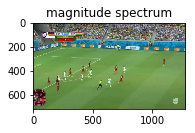

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("aa.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.namedWindow("Original Window",cv2.WINDOW_NORMAL)
img=np.array(img)
pq=img
im=img

I=im2double(img)
I = np.array(I)
I=I.astype(np.float32)
plt.subplot(122),plt.imshow(I,'gray'),plt.title('magnitude spectrum')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 500
fig_size[1] = 500
plt.rcParams["figure.figsize"]=fig_size
# cv2.imshow("Original Window",I)
# cv2.waitKey()

In [2]:
HSV=rgb_to_hsv(I)
H=HSV[:,:,0];
H=np.reshape(H,(720*1280,1))
S=HSV[:,:,1];
S=np.reshape(S,(720*1280,1))
V=HSV[:,:,2];
V=np.reshape(V,(720*1280,1))

# cv2.namedWindow("H Image",cv2.WINDOW_NORMAL)
# cv2.imshow("H Image",HSV[:,:,0])
# cv2.waitKey()
counts,compr = np.histogram(HSV[:,:,0],256);
compr=compr[:-1]-np.diff(compr)/2
maxEl=np.amax(counts)
index=np.where(counts ==maxEl)
print(index)

hsv=np.concatenate((H,S,V),axis=1)
hsv=hsv.astype(np.float32)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)


flags = cv2.KMEANS_RANDOM_CENTERS


sumd,idx,center = cv2.kmeans(hsv,2,None,criteria,1,flags)
print(sumd)
print(idx)
print(center)
thresh=threshold ( grey_image, bin_image, 0, 255, THRESH_BINARY | THRESH_OTSU );